In [42]:
import numpy as np
import matplotlib.pyplot as plt


In [43]:
def a0(q):
    return -0.5*q**2+7/128*q**4-29/(2304)*q**6+68687/(18874368)*q**8
def b1(q):
    return 1-q-1/8*q**2+1/64*q**3-1/1536*q**4-11/(36864)*q**5


qlist = np.linspace(0,1.2,1000)

a0s = a0(qlist)
b1s = b1(qlist)
plt.rc('font',size = 14)

Text(0.55, -0.1, 'Single ion stability')

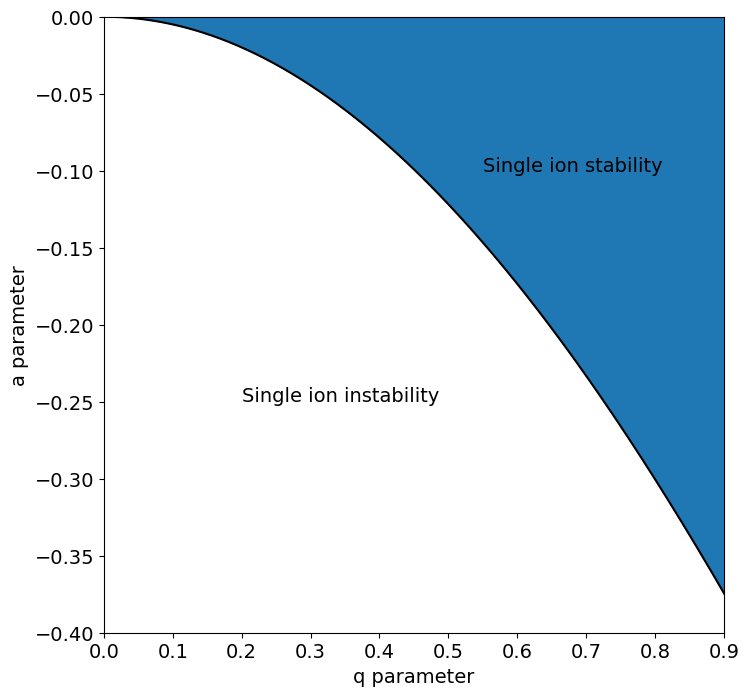

In [44]:
fig,ax = plt.subplots(figsize = (8,8))
ax.plot(qlist,a0s,color = 'k')
ax.plot(qlist,b1s,color = 'k')
ax.set_ylim(-0.4,0)
zer = np.zeros(np.shape(a0s))
#ax.fill_between(qlist[b1s>0],a0s[b1s>0],zer[b1s>0],color = 'grey')
#ax.fill_between(qlist[b1s<0],a0s[b1s<0],b1s[b1s<0],color = 'grey')
uppercurve = np.zeros(np.shape(b1s))
for j,a in enumerate(b1s):
    if a <0:
        uppercurve[j]=a
ax.fill_between(qlist,a0s,uppercurve,color = 'tab:blue')
#ax.set_xlim(0,0.8)
plt.xlabel('q parameter')
plt.ylabel('a parameter')
ax.text(0.20,-0.25,'Single ion instability')
ax.text(0.55,-0.10,'Single ion stability')

In [45]:

q = 0.3
a = -0.025
Omega_RF = 5.2*1e6*2*np.pi
sec_freq = Omega_RF/2*np.sqrt(q**2/2+a)
print(sec_freq/(2*np.pi)*1e-3)
t = np.linspace(0,1e-5,1000)
def motion(t):
    
    return 1*(1-q/2*np.cos(Omega_RF*t))*np.cos(sec_freq*t)
positions = motion(t)

367.6955262170047


Text(0.5, 0, '$\\frac{\\omega_r t}{2\\pi}$')

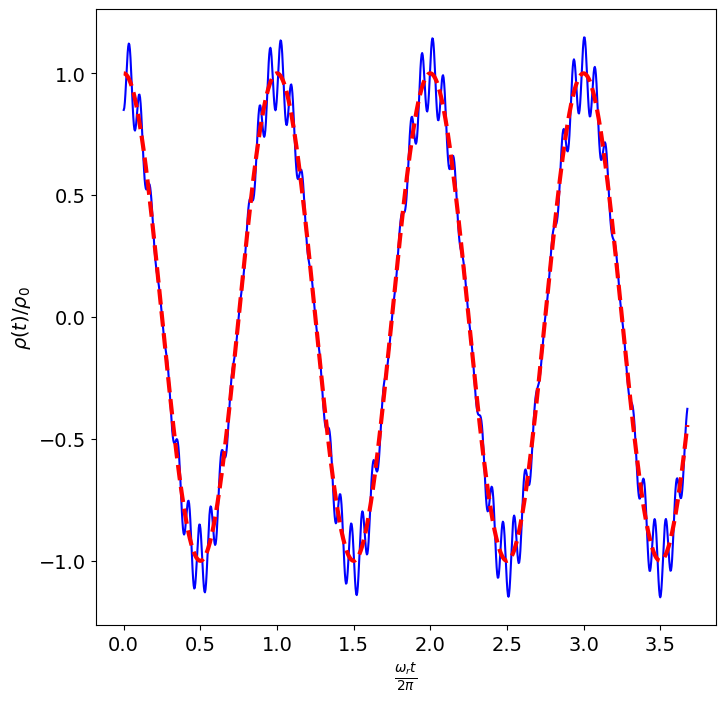

In [46]:
fig, ax = plt.subplots(figsize = (8,8))
ax.plot(t*sec_freq/(2*np.pi),positions,color = 'b')
ax.plot(t*sec_freq/(2*np.pi),np.cos(sec_freq*t),linestyle = '--',color = 'r',linewidth = 3)
ax.set_ylabel(r'$\rho(t) / \rho_0$')
ax.set_xlabel(r'$\frac{\omega_r t}{2\pi}$')